# 【実習11】４の解析データ１（自転車利用回数）

In [8]:
import mglearn

In [9]:
citibike = mglearn.datasets.load_citibike()

Text(0, 0.5, 'Rentals')

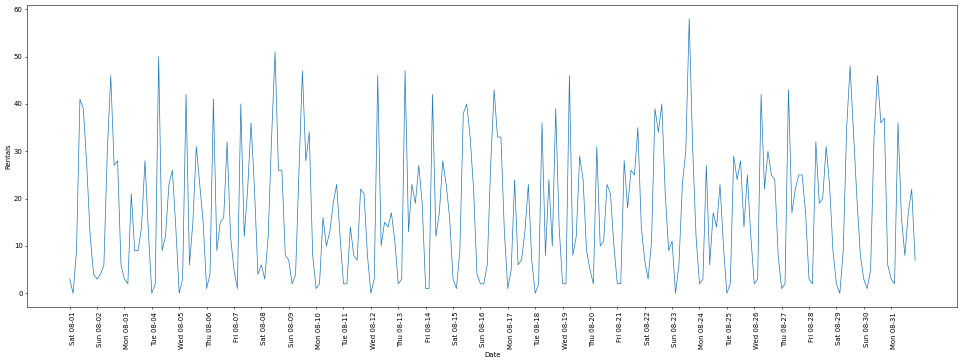

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(24, 8), dpi=50)
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [19]:
print(len(citibike))

248


# 【実習12】LSTMによる回帰

In [16]:
import numpy as np

P = citibike
Q = np.array(P).reshape(-1,1)

X1 = Q[0:-3, :]  # 予測対象日の3日前のデータ
X2 = Q[1:-2, :]  # 予測対象日の2日前のデータ
X3 = Q[2:-1, :]  # 予測対象日の前日データ
Y = Q[3:, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [20]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
# train, testデータを定義
X_train = X[:160, :, :]
X_test = X[160:, :, :]
Y_train = Y[:160, :]
Y_test = Y[160:, :]

In [21]:
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics

model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)

Epoch 1/100
5/5 - 2s - loss: 0.1472 - mean_absolute_error: 0.3032
Epoch 2/100
5/5 - 0s - loss: 0.1330 - mean_absolute_error: 0.2794
Epoch 3/100
5/5 - 0s - loss: 0.1236 - mean_absolute_error: 0.2642
Epoch 4/100
5/5 - 0s - loss: 0.1157 - mean_absolute_error: 0.2535
Epoch 5/100
5/5 - 0s - loss: 0.1086 - mean_absolute_error: 0.2445
Epoch 6/100
5/5 - 0s - loss: 0.1022 - mean_absolute_error: 0.2358
Epoch 7/100
5/5 - 0s - loss: 0.0963 - mean_absolute_error: 0.2292
Epoch 8/100
5/5 - 0s - loss: 0.0909 - mean_absolute_error: 0.2224
Epoch 9/100
5/5 - 0s - loss: 0.0859 - mean_absolute_error: 0.2158
Epoch 10/100
5/5 - 0s - loss: 0.0813 - mean_absolute_error: 0.2102
Epoch 11/100
5/5 - 0s - loss: 0.0773 - mean_absolute_error: 0.2053
Epoch 12/100
5/5 - 0s - loss: 0.0737 - mean_absolute_error: 0.2010
Epoch 13/100
5/5 - 0s - loss: 0.0706 - mean_absolute_error: 0.1973
Epoch 14/100
5/5 - 0s - loss: 0.0678 - mean_absolute_error: 0.1949
Epoch 15/100
5/5 - 0s - loss: 0.0656 - mean_absolute_error: 0.1930
Epoc

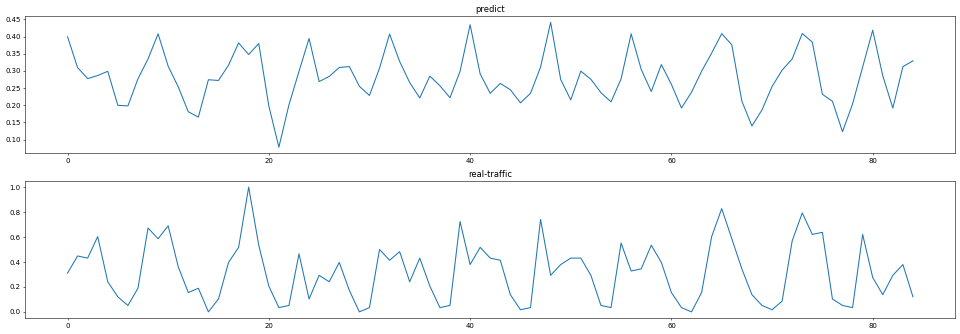

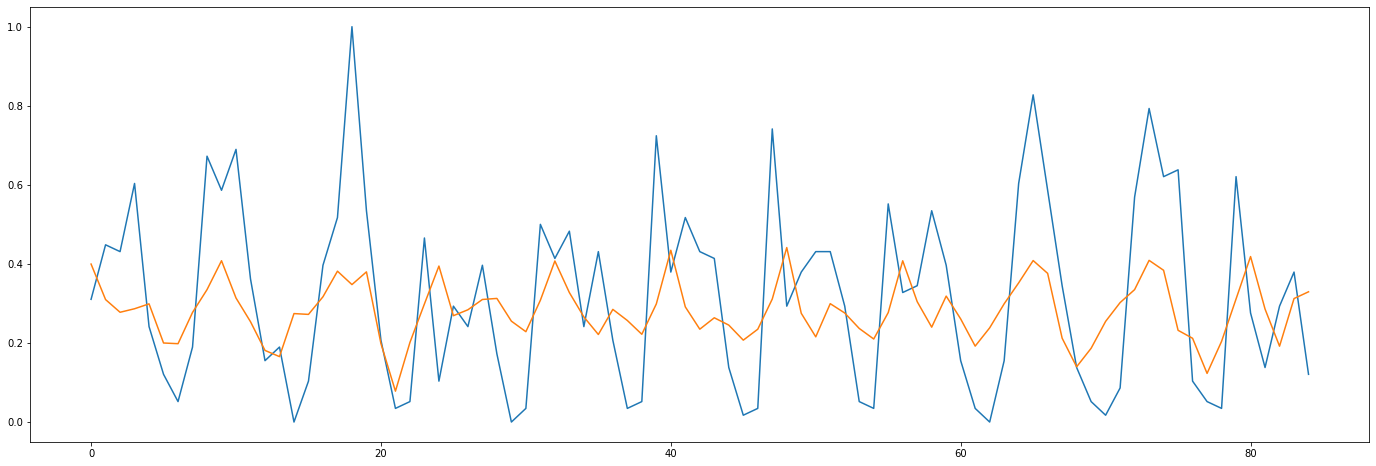

In [24]:
Predict = model.predict(X_test)

#plt.figure(figsize=(24, 8), dpi=50)
#plt.plot(Predict)
#plt.plot(Y_test)

plt.figure(figsize=(24, 8), dpi=50)
plt.subplot(211)
plt.title("predict")
plt.plot(Predict)
plt.subplot(212)
plt.title("real-traffic")
plt.plot(Y_test)


plt.figure(figsize=(24,8))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')